# Member Referrals analysis

The CEO has come to your desk and explained that we want to increase signups from *our 
referral scheme*. As part of this effort, we are keen to understand at what point in the 
member lifecycle members refer other people. There are 2 CSV files 
that contain information on customers and their referral behaviour: 
 
● The Customer Info CSV contains information on customers and metadata for each 
customer. It is a representative sample of the whole customer database 
 
● The Referral Info CSV is a log of sign-ups we have received from the referral 
channel 
 
Use this information to answer the questions below: 
 
1. When do members refer?  
(Try to think about each member lifetime, starting from when they sign-up to Bulb. 
The number of Bulb members is growing very quickly. A lot of Bulb members have not been with 
Bulb for very long. Think about how this might affect your conclusions.) 
 
2. Does the channel members are acquired from significantly impact how they refer? Do 
you think we need a larger sample size to be sure? 
 
3. We can send an email to members to invite them to refer their friends. We can choose 
when, and to whom, we send the emails. How would you suggest we proceed? 


In [2]:
#Let's load the data that we have first
import pandas as pd

customer_info = pd.read_csv('data/180601_Customer_Info.csv')
referral_info = pd.read_csv('data/180601_Referrals_Info.csv')

In [3]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1699 non-null   int64 
 1   sign_up_date     1699 non-null   object
 2   sign_up_channel  1699 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.9+ KB


In [5]:
customer_info.sample(5)

,customer_id,sign_up_date,sign_up_channel
1433,2613,2021-06-28,Price Comparison Website
1097,2692,2021-08-27,Price Comparison Website
44,471,2021-07-20,Referral
1130,2282,2021-07-19,Bulb Website
813,1860,2021-06-27,Price Comparison Website


In [6]:
referral_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   referral_date         1000 non-null   object
 1   referrer_customer_id  1000 non-null   int64 
 2   sign_up_customer_id   1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [7]:
referral_info.sample(5)

,referral_date,referrer_customer_id,sign_up_customer_id
129,2021-06-17,567,1499
851,2021-06-20,712,1666
310,2021-07-17,88,962
49,2021-07-14,6,1034
328,2021-09-28,370,1269


## Customer signup histogram

In [12]:
#set the date data as datetime in pandas
customer = customer_info.copy()
customer.sign_up_date = pd.to_datetime(customer.sign_up_date)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1699 non-null   int64         
 1   sign_up_date     1699 non-null   datetime64[ns]
 2   sign_up_channel  1699 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 39.9+ KB


In [14]:
#set the date data as datetime in pandas
referral = referral_info.copy()
referral.referral_date = pd.to_datetime(referral.referral_date)
referral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   referral_date         1000 non-null   datetime64[ns]
 1   referrer_customer_id  1000 non-null   int64         
 2   sign_up_customer_id   1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 23.6 KB


<AxesSubplot:xlabel='sign_up_date', ylabel='Count'>

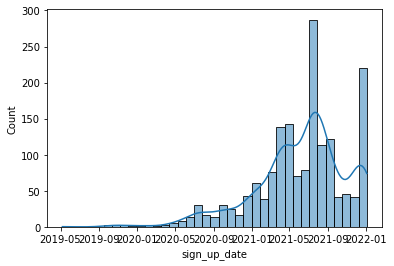

In [18]:
import seaborn as sns
sns.histplot(customer.sign_up_date, kde=True)